In [1]:
import numpy as np
import h5py
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import math
import PyFiles.MLFunctionsForPytorch as MLFun

In [2]:
#Neural network with 1 hidden layer

class MultiRegressor1Layer(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.norm0 = nn.BatchNorm1d(2)
    self.linear1 = nn.Linear(in_features=2, out_features=64)
    self.norm1 = nn.BatchNorm1d(64)
    self.act1 = nn.LeakyReLU()
    self.dropout = nn.Dropout()
    self.linear2 = nn.Linear(in_features=64, out_features=16)
    self.norm2 = nn.BatchNorm1d(16)
    #self.dropout = nn.Dropout()
    self.act2 = nn.LeakyReLU()
    self.output = nn.Linear(in_features=16, out_features = 3)
    


  def forward(self, x):
    '''
      Forward pass
    '''
    x = self.norm0(x)
    x = self.linear1(x)
    x = self.norm1(x)
    x = self.act1(x)
    #x = self.dropout(x)
    x = self.linear2(x)
    x = self.norm2(x)
    #x = self.dropout(x)
    x = self.act2(x)
    x = self.output(x)
    
    
    return x

class MLP(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.norm0 = nn.BatchNorm1d(2)
    self.linear1 = nn.Linear(in_features=2, out_features=64)
    self.norm1 = nn.BatchNorm1d(64)
    self.act1 = nn.LeakyReLU()
    self.linear2 = nn.Linear(in_features=64, out_features=16)
    self.norm2 = nn.BatchNorm1d(16)
    self.act2 = nn.LeakyReLU()
    self.linear3 = nn.Linear(in_features=16, out_features=16)
    self.norm3 = nn.BatchNorm1d(16)
    self.act3 = nn.LeakyReLU()
    self.output = nn.Linear(in_features=16, out_features = 3)
    


  def forward(self, x):
    '''
      Forward pass
    '''
    x = self.norm0(x)
    x = self.linear1(x)
    x = self.norm1(x)
    x = self.act1(x)
    x = self.linear2(x)
    x = self.norm2(x)
    x = self.act2(x)
    x = self.output(x)
    
    
    return x

# Import data from H5 file and import model

In [3]:
#See if I can import all of the data from a file

numPoints = 20000
numEpochs = 10

filename = 'Dataset/Data_Fuchs_v_2.3_Wright_Pat_Narrow_Range_energy_limit_0.01_lambda_um_0.8_points_' + str(100000) + '_seed_3.h5'
#filename = 'Dataset/Data_Fuchs_v_2.7_Wright_Pat_Narrow_Range_energy_limit_0.01_deviation_0.1_lambda_um_0.8_points_100000_seed_3.h5'

#modelPath = "Models/" + str(numPoints) + "_points_" + str(numEpochs) + "_epochs_" + "WP_Constraints.pt"
#modelPath = "Models/" + str(numPoints) + "_points_" + "2_inputs_" + str(numEpochs) + "_epochs_" + "WP_Constraints.pt"
modelPath = "Models/50000_points_2_inputs_45_epochs__2_layers_lr0.001_WP_Constraints_gaussian_noise_0.1.pt"
#modelPath = "Models/40000_points_2_inputs_40_epochs__gaussian_noise_0.1_2_layers_lr1e-3_WP_Constraints.pt"
#modelPath = "Models/10000_points_2_inputs_20_epochs_2_layers_lr1e-3_WP_Constraints.pt"
#model = MultiRegressor1Layer()
model = MLP()
model.load_state_dict(torch.load(modelPath))
model = model.to('cuda')
model.eval()

h5File = h5py.File(filename, 'r+')

In [4]:
#Read columns

intens = h5File['Intensity_(W_cm2)']

duration = h5File['Pulse_Duration_(fs)']

thickness = h5File['Target_Thickness (um)']

spotSize = h5File['Spot_Size_(FWHM um)']

maxEnergy = h5File['Max_Proton_Energy_(MeV)']

totalEnergy = h5File['Total_Proton_Energy_(MeV)']

avgEnergy = h5File['Avg_Proton_Energy_(MeV)']

test = zip(intens, duration, thickness, spotSize, maxEnergy, totalEnergy, avgEnergy)

print(next(test)) #Prints the first row from the h5 file

nextRow = next(test)

print(type(nextRow))

#Convert columns into numpy arrays
npIntens = np.fromiter(intens, float)
npDuration = np.fromiter(duration, float)
npThickness = np.fromiter(thickness, float)
npSpot = np.fromiter(spotSize, float)
npMaxEnergy = np.fromiter(maxEnergy, float)
npTotalEnergy = np.fromiter(totalEnergy, float)
npAvgEnergy = np.fromiter(avgEnergy, float)

#print(npIntens)

print(npIntens.shape)

#Join all of those arrays into one big numpy array
npFile = np.dstack((npIntens, npDuration, npThickness, npSpot, npMaxEnergy, npTotalEnergy, npAvgEnergy))

print(npFile.shape)

npFile = npFile.reshape(100000, 7)

print(npFile.shape)

#Two input version
npFile = np.dstack((npIntens, npThickness, npMaxEnergy, npTotalEnergy, npAvgEnergy))
npFile = npFile.reshape(100000, 5)

print("Average Energy:", npAvgEnergy)
print("Total Energy:", npTotalEnergy)

print(npFile)

(3.554658652723451e+18, 40.0, 3.2635950196729713, 2.0, 0.014152801884910363, 2.167760095967844e-08, 0.0021860744810277663)
<class 'tuple'>
(100000,)
(1, 100000, 7)
(100000, 7)
Average Energy: [0.00218607 0.00072374 0.00029962 ... 0.00034729 0.005225   0.00017811]
Total Energy: [2.16776010e-08 1.50739278e-09 3.93994593e-10 ... 5.39032406e-10
 8.73815870e-08 2.39945759e-10]
[[3.55465865e+18 3.26359502e+00 1.41528019e-02 2.16776010e-08
  2.18607448e-03]
 [1.12581545e+18 7.83824003e-01 4.66375879e-03 1.50739278e-09
  7.23739253e-04]
 [1.05677342e+18 2.96289825e+00 1.88287769e-03 3.93994593e-10
  2.99618796e-04]
 ...
 [1.18204769e+18 3.11664616e+00 2.18491944e-03 5.39032406e-10
  3.47290327e-04]
 [4.10586569e+18 1.30290053e+00 3.51546134e-02 8.73815870e-08
  5.22500354e-03]
 [1.44309994e+18 7.68944317e+00 1.10189866e-03 2.39945759e-10
  1.78111804e-04]]


# Prepare our dataset

In [5]:
testingDataset = h5File.create_dataset(name=None, data=npFile)
dataloader = DataLoader(testingDataset, batch_size=npFile.shape[0], shuffle=True)

In [6]:
iterDataLoader = iter(dataloader)

testData = next(iterDataLoader)

In [7]:
# #Get each separate input for future plotting reasons
# intens = testData[:, 0:1]
# duration = testData[:, 1]
# thickness = testData[:, 2]
# spotSize = testData[:, 3]

#Two input version
intens = testData[:, 0:1]
thickness = testData[:, 1:2]

#Transform intens by a log function
logIntens = np.log(intens)

#Transform thickness by a log function
logThickness = np.log(thickness)

print(logIntens.size(), testData[:,1:4].size())
#Process intensity by putting it on a log scale
#inputs = torch.cat((logIntens, testData[:,1:4]), axis = 1)

#Two input version
inputs = torch.cat((logIntens, testData[:,1:2]), axis = 1)


#Turn logIntens back into a tensor that can be passed to a plot
intens = testData[:, 0]
logIntens = np.log(intens)


#Two input ver.
target = testData[:, 2:5]
target = np.log(target)

inputs = inputs.to('cuda')
target = target.to('cuda')

inputs, target = inputs.float(), target.float()
target = target.reshape((target.shape[0],3))

#print("Inputs:", inputs)
#print("Targets:", target)

output = model(inputs)

#target = np.log(testData[:, 4:7])
target = np.log(testData[:, 2:5])

# print("Targets:", target)
# #print(output)
# print("Outputs:", output)

torch.Size([100000, 1]) torch.Size([100000, 3])


## It seems the multi-regressor has a habit of under-predicting max and total proton energy by a slight margin. It is way off for average proton energy though, maybe try applying a log-scale?

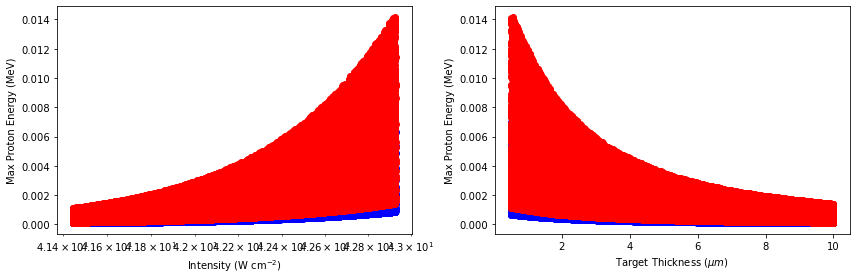

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

#Plot the actual data and the regressor's predicted data

#Max KE Energy plots

index = 2

# fig=plt.figure(figsize=(12,4))
# plt.subplot(1, 4, 1)
# plt.scatter(logIntens,np.exp(target[:, index].cpu().detach().numpy()), color = 'blue')
# plt.scatter(logIntens,np.exp(output[:, index].cpu().detach().numpy()), color = 'red')
# plt.xscale('log')
# plt.xlabel(r'Intensity (W cm$^{-2}$)')
# plt.ylabel('Max Proton Energy (MeV)')

# plt.subplot(1, 4, 2)
# plt.scatter(duration,np.exp(target[:, index].cpu().detach().numpy()), color = 'blue')
# plt.scatter(duration,np.exp(output[:, index].cpu().detach().numpy()), color = 'red')
# plt.xlabel('Pulse Duration (fs)')
# plt.ylabel('Max Proton Energy (MeV)')

# plt.subplot(1, 4, 3)
# plt.scatter(thickness,np.exp(target[:, index].cpu().detach().numpy()), color = 'blue')
# plt.scatter(thickness,np.exp(output[:, index].cpu().detach().numpy()), color = 'red')
# plt.xlabel(r'Target Thickness ($\mu m$)')
# plt.ylabel('Max Proton Energy (MeV)')

# plt.subplot(1, 4, 4)
# plt.scatter(spotSize,np.exp(target[:, index].cpu().detach().numpy()), color = 'blue')
# plt.scatter(spotSize,np.exp(output[:, index].cpu().detach().numpy()), color = 'red')
# plt.xlabel(r'Spot Size  (FWHM, $\mu m$)')
# plt.ylabel('Max Proton Energy (MeV)')
# plt.tight_layout()

fig=plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.scatter(logIntens,np.exp(target[:, index].cpu().detach().numpy()), color = 'blue')
plt.scatter(logIntens,np.exp(output[:, index].cpu().detach().numpy()), color = 'red')
plt.xscale('log')
plt.xlabel(r'Intensity (W cm$^{-2}$)')
plt.ylabel('Max Proton Energy (MeV)')

plt.subplot(1, 2, 2)
plt.scatter(thickness,np.exp(target[:, index].cpu().detach().numpy()), color = 'blue')
plt.scatter(thickness,np.exp(output[:, index].cpu().detach().numpy()), color = 'red')
plt.xlabel(r'Target Thickness ($\mu m$)')
plt.ylabel('Max Proton Energy (MeV)')



plt.tight_layout()
plt.show()

# Error plots
## First max kinetic energy, then total energy, and finally average energy

In [9]:
#Extract predicted values and target values for each output

maxTarget = np.exp(target[:, 0].cpu().detach().numpy())
maxPred = np.exp(output[:, 0].cpu().detach().numpy())

totalTarget = np.exp(target[:, 1].cpu().detach().numpy())
totalPred = np.exp(output[:, 1].cpu().detach().numpy())

avgTarget = np.exp(target[:, 2].cpu().detach().numpy())
avgPred = np.exp(output[:, 2].cpu().detach().numpy())

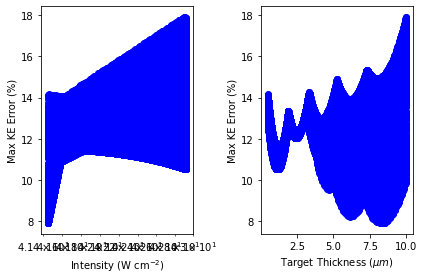

In [10]:
#Plot relative error and relative error magnitude

MLFun.plot_relative_error(maxTarget, maxPred, logIntens, duration, thickness, spotSize, 'Max KE Error (%)')

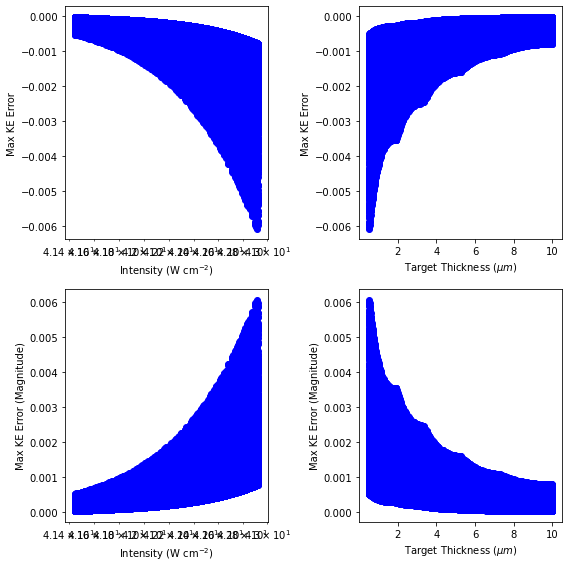

In [11]:
#Also plot absolute errors

MLFun.plot_absolute_error(maxTarget, maxPred, logIntens, duration, thickness, spotSize, 'Max KE Error')

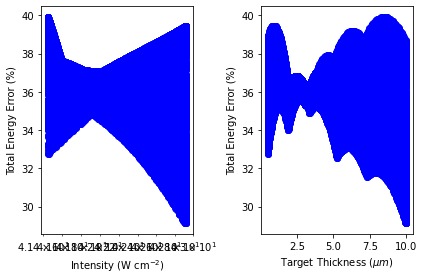

In [12]:
#Errors for total proton energy

MLFun.plot_relative_error(totalTarget, totalPred, logIntens, duration, thickness, spotSize, 'Total Energy Error (%)')

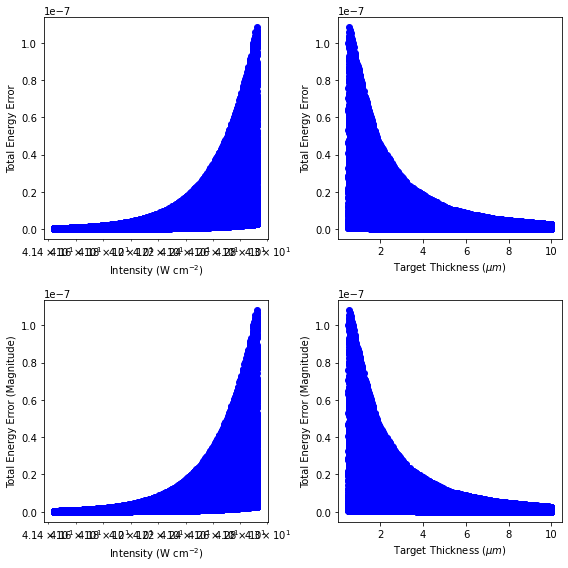

In [13]:
MLFun.plot_absolute_error(totalTarget, totalPred, logIntens, duration, thickness, spotSize, 'Total Energy Error')

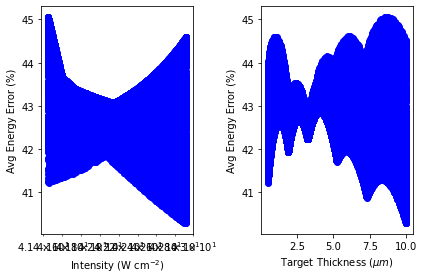

In [14]:
#Finally, do average energy

MLFun.plot_relative_error(avgTarget, avgPred, logIntens, duration, thickness, spotSize, 'Avg Energy Error (%)')

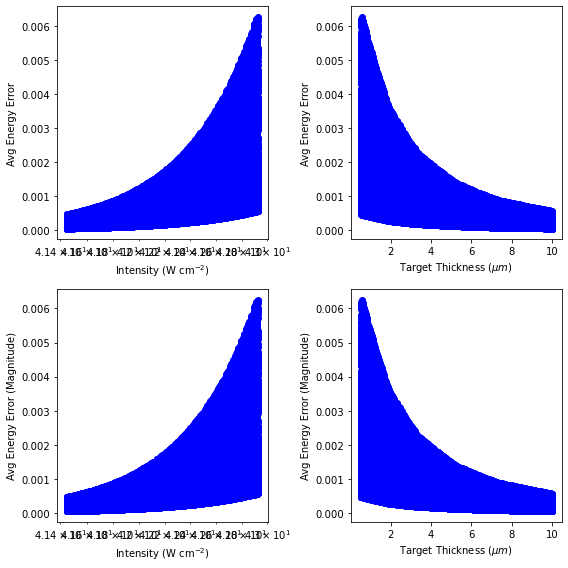

In [15]:
MLFun.plot_absolute_error(avgTarget, avgPred, logIntens, duration, thickness, spotSize, 'Avg Energy Error')

In [18]:
#Calculate mean squared error values
#Also calculate the average relative error

error = [0., 1., 2.]
percentError = [0., 1., 2.]

for index in range(3):
    error[index] = MLFun.calc_MSE_Error(target, output, index)
    percentError[index] = MLFun.calc_Avg_Percent_Error(target, output, index)
    
print("Max KE MSE:", error[0])
print("Max KE Average Relative Error:", percentError[0])
print("Total Energy MSE:", error[1])
print("Total Energy Average Relative Error:", percentError[1])
print("Avg Energy MSE:", error[2])
print("Avg Energy Average Relative Error:", percentError[2])

Max KE MSE: 4.881408389191043e-07
Max KE Average Relative Error: 12.736106828628632
Total Energy MSE: 2.066467998563055e-17
Total Energy Average Relative Error: 35.83357735177462
Avg Energy MSE: 5.213471465153264e-07
Avg Energy Average Relative Error: 42.62994403575981


<IPython.core.display.Javascript object>


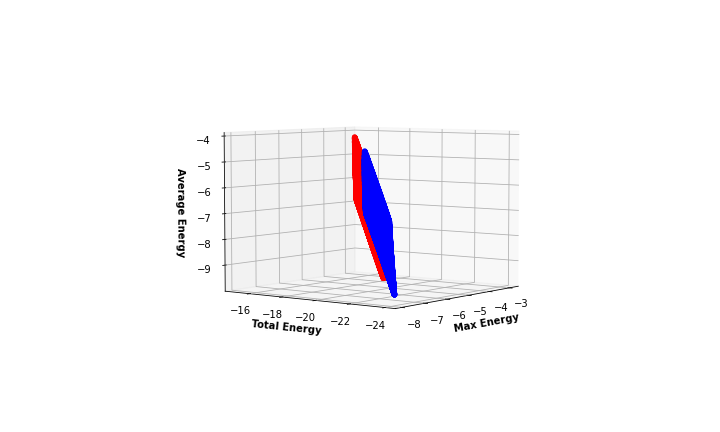

In [19]:
%matplotlib notebook
import matplotlib.pyplot as plt

#We'll be using matplotlib notebooks so we can easily rotate the 3-D plots interactively
#Note that when we have many, many points, these plots can be very slow to respond to rotations

size3D = (10,6) #Controls the figure size for our plots

fig = plt.figure(figsize=size3D)

#Intensity and Pulse Duration
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.mouse_init()
ax.set_xlabel('Max Energy', fontweight ='bold')
ax.set_ylabel('Total Energy', fontweight ='bold')
ax.set_zlabel('Average Energy', fontweight ='bold')
ax.scatter3D(target[:, 0].cpu().detach().numpy(), target[:, 1].cpu().detach().numpy(), target[:, 2].cpu().detach().numpy(),
            color = 'blue')
ax.scatter3D(output[:, 0].cpu().detach().numpy(), output[:, 1].cpu().detach().numpy(), output[:, 2].cpu().detach().numpy(),
            color = 'red')

# Let's evaluate the performance of the neural network only for the highest intensities

In [20]:
#Create a new np array that is a filter of the npFile

#print(npFile[:, 0])
#print(npFile[1])
#print(npFile[1,0])

percentile = np.percentile(npFile[:,0], 80)
#print(percentile)

#npHighIntens = np.empty( (math.floor(npFile.shape[0] * 0.2), 7))

#Two input version
npHighIntens = np.empty( (math.floor(npFile.shape[0] * 0.2), 5))

#print(npHighIntens.shape)

In [21]:
#Iterate through npFile and add all high intens element into the npHighIntens array

numHighIntens = 0

for x in range(npFile.shape[0]):
    
    if(npFile[x, 0] >= percentile):
        npHighIntens[numHighIntens] = npFile[x]
        numHighIntens += 1
        
#print(npHighIntens)

# Now process the Numpy array

In [22]:
#Get Torch tensor from Numpy array
highIntens = torch.from_numpy(npHighIntens)

# #Get each separate input for future plotting reasons
# intens = highIntens[:, 0:1]
# duration = highIntens[:, 1]
# thickness = highIntens[:, 2]
# spotSize = highIntens[:, 3]

#Two input version
intens = highIntens[:, 0:1]
thickness = highIntens[:, 1:2]

#Transform intens by a log function
logIntens = np.log(intens)

# #Transform thickness by a log function
# logThickness = np.log(thickness)

print(logIntens.size(), highIntens[:,1:4].size())
#Process intensity by putting it on a log scale
#inputs = torch.cat((logIntens, highIntens[:,1:4]), axis = 1)

#Two input version
inputs = torch.cat((logIntens, highIntens[:, 1:2]), axis = 1)

# #Two input version, log
# inputs = torch.cat((logIntens, logThickness), axis = 1)


#Turn logIntens back into a tensor that can be passed to a plot
intens = highIntens[:, 0]
logIntens = np.log(intens)

# #Turn logThickness back into a tensor that can be passed to a plot
# thickness = highIntens[:, 1]
# logThickness = np.log(thickness)

# target = highIntens[:, 4:7]
# target = np.log(target)

#Two input version
target = highIntens[:, 2:5]
target = np.log(target)

inputs = inputs.to('cuda')
target = target.to('cuda')

inputs, target = inputs.float(), target.float()
target = target.reshape((target.shape[0],3))

#print("Inputs:", inputs)
#print("Targets:", target)

output = model(inputs)

#target = np.log(highIntens[:, 4:7])

target = np.log(highIntens[:, 2:5])

print("Targets:", target)
#print(output)
print("Outputs:", output)

torch.Size([20000, 1]) torch.Size([20000, 3])
Targets: tensor([[ -4.2578, -17.6470,  -6.1256],
        [ -4.3242, -17.7538,  -6.1899],
        [ -4.5387, -17.8457,  -6.3914],
        ...,
        [ -3.5998, -16.7837,  -5.4999],
        [ -4.4775, -18.0068,  -6.3387],
        [ -3.3480, -16.2530,  -5.2543]], dtype=torch.float64)
Outputs: tensor([[ -4.3890, -17.2097,  -5.5735],
        [ -4.4535, -17.3152,  -5.6366],
        [ -4.6700, -17.4435,  -5.8473],
        ...,
        [ -3.7029, -16.2941,  -4.9213],
        [ -4.5999, -17.5621,  -5.7805],
        [ -3.4495, -15.7612,  -4.6695]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


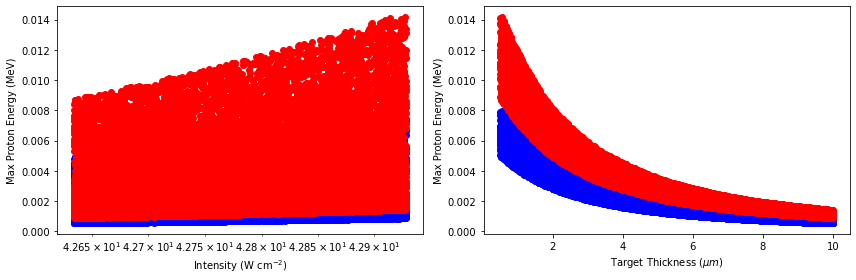

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

index = 2

# fig=plt.figure(figsize=(12,4))
# plt.subplot(1, 4, 1)
# plt.scatter(logIntens,np.exp(target[:, index].cpu().detach().numpy()), color = 'blue')
# plt.scatter(logIntens,np.exp(output[:, index].cpu().detach().numpy()), color = 'red')
# plt.xscale('log')
# plt.xlabel(r'Intensity (W cm$^{-2}$)')
# plt.ylabel('Max Proton Energy (MeV)')

# plt.subplot(1, 4, 2)
# plt.scatter(duration,np.exp(target[:, index].cpu().detach().numpy()), color = 'blue')
# plt.scatter(duration,np.exp(output[:, index].cpu().detach().numpy()), color = 'red')
# plt.xlabel('Pulse Duration (fs)')
# plt.ylabel('Max Proton Energy (MeV)')

# plt.subplot(1, 4, 3)
# plt.scatter(thickness,np.exp(target[:, index].cpu().detach().numpy()), color = 'blue')
# plt.scatter(thickness,np.exp(output[:, index].cpu().detach().numpy()), color = 'red')
# plt.xlabel(r'Target Thickness ($\mu m$)')
# plt.ylabel('Max Proton Energy (MeV)')

# plt.subplot(1, 4, 4)
# plt.scatter(spotSize,np.exp(target[:, index].cpu().detach().numpy()), color = 'blue')
# plt.scatter(spotSize,np.exp(output[:, index].cpu().detach().numpy()), color = 'red')
# plt.xlabel(r'Spot Size  (FWHM, $\mu m$)')
# plt.ylabel('Max Proton Energy (MeV)')

fig=plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.scatter(logIntens,np.exp(target[:, index].cpu().detach().numpy()), color = 'blue')
plt.scatter(logIntens,np.exp(output[:, index].cpu().detach().numpy()), color = 'red')
plt.xscale('log')
plt.xlabel(r'Intensity (W cm$^{-2}$)')
plt.ylabel('Max Proton Energy (MeV)')

plt.subplot(1, 2, 2)
plt.scatter(thickness,np.exp(target[:, index].cpu().detach().numpy()), color = 'blue')
plt.scatter(thickness,np.exp(output[:, index].cpu().detach().numpy()), color = 'red')
plt.xlabel(r'Target Thickness ($\mu m$)')
plt.ylabel('Max Proton Energy (MeV)')


plt.tight_layout()
plt.show()

In [28]:
#Plot relative error and relative error magnitude

MLFun.plot_relative_error(target, output, logIntens, duration, thickness, spotSize, 0, 'Max KE Error (%)')

TypeError: plot_relative_error() takes 7 positional arguments but 8 were given

In [29]:
#Also plot absolute errors

MLFun.plot_absolute_error(target, output, logIntens, duration, thickness, spotSize, 0, 'Max KE Error')

TypeError: plot_absolute_error() takes 7 positional arguments but 8 were given

In [30]:
MLFun.plot_relative_error(target, output, logIntens, duration, thickness, spotSize, 1, 'Total Energy Error (%)')

TypeError: plot_relative_error() takes 7 positional arguments but 8 were given

In [ ]:
MLFun.plot_absolute_error(target, output, logIntens, duration, thickness, spotSize, 1, 'Total Energy Error')

In [ ]:
#Finally, do average energy

MLFun.plot_relative_error(target, output, logIntens, duration, thickness, spotSize, 2, 'Avg Energy Error (%)')

In [ ]:
MLFun.plot_absolute_error(target, output, logIntens, duration, thickness, spotSize, 2, 'Avg Energy Error')